In [1]:
#lets import dependenctries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [2]:
#loading dataset from csv to pandas dataframe
wine = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\winequality-red.csv")

In [3]:
#print first 5 rows of dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#total rows & columns
wine.shape

(1599, 12)

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#finding the null value
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

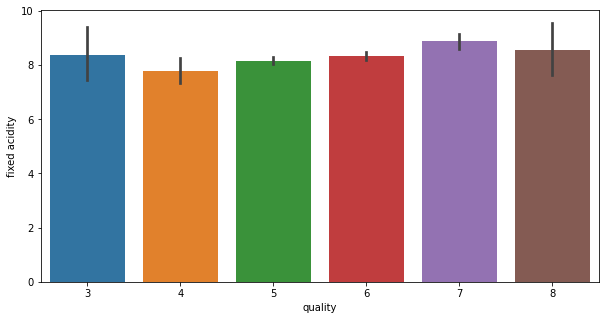

In [9]:
#lets see how the data has been distributed in columns
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='fixed acidity')

Here, we can see fixed acidity does not give any specification to the classification of quality

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

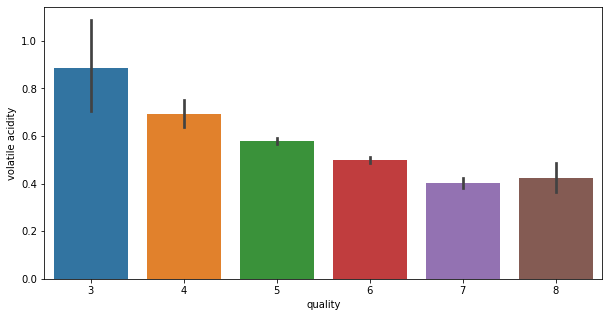

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='volatile acidity')

Here we can see downtrend of volatile acidity as the quality goes higher

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

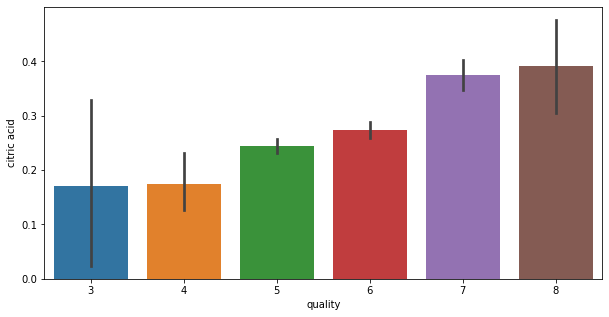

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='citric acid')

Here we can see uptrend in citric acid as the quality goes higher

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

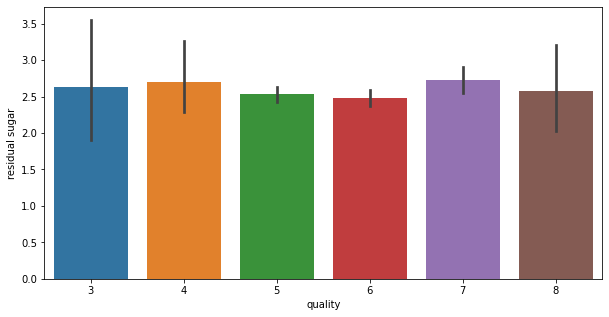

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='residual sugar')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

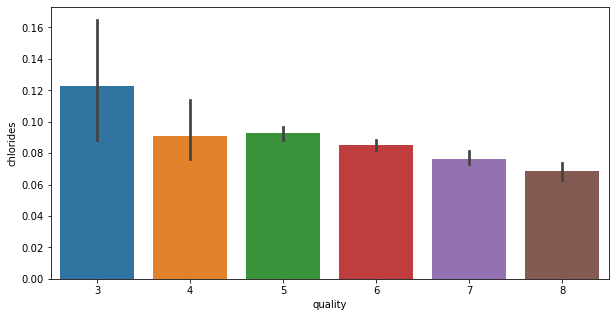

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='chlorides')

In [18]:
Composition of the cholorides goes down as the quality of wine gets higher

SyntaxError: invalid syntax (2146615252.py, line 1)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

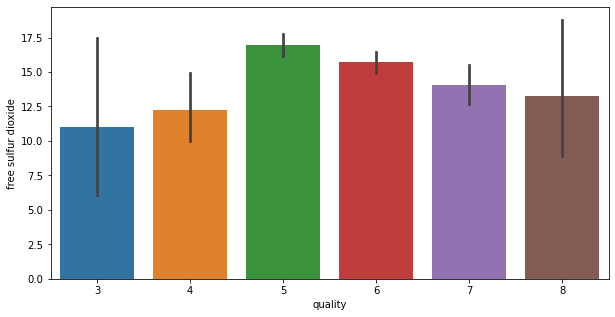

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='free sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

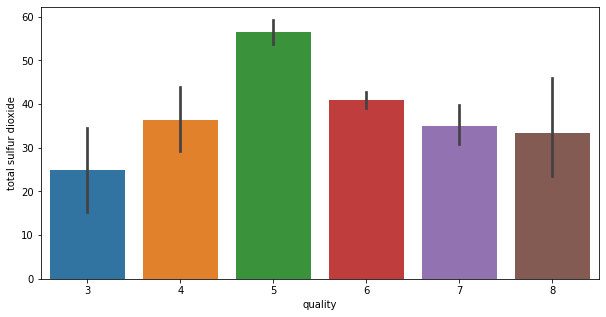

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='total sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

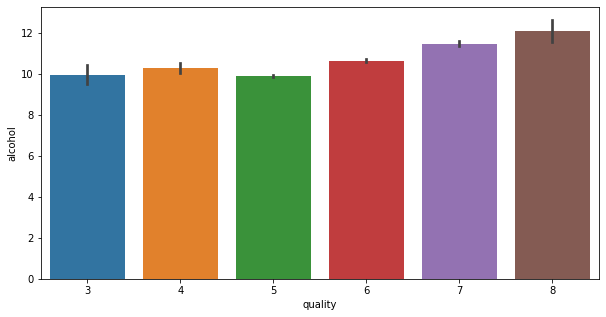

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='alcohol')

Alcohol level also goes higher as te quality of wine increases

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

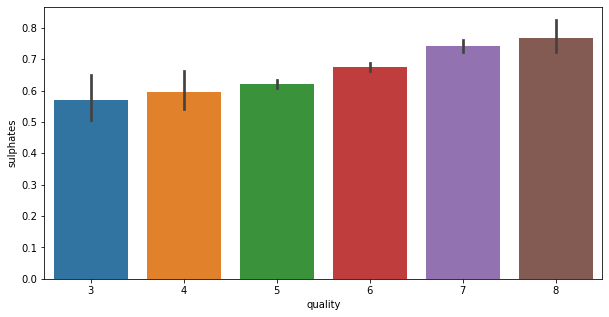

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(data=wine,x='quality',y='sulphates')

Sulphates level goes higher with the quality of wine

# Pre-Processing 

In [23]:
#lets make binary classification for response variable
#dividing wine as good and bad by giving limit for quality

bins =(2, 6.5, 8)
group_name =['good','bad']
wine['quality'] = pd.cut(wine['quality'],bins=bins, labels=group_name)

In [24]:
label_quality = LabelEncoder()

In [25]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [26]:
wine['quality'].value_counts()

0    855
1    744
Name: quality, dtype: int64

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

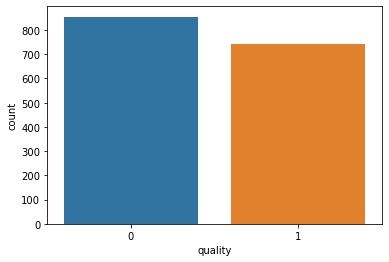

In [27]:
sns.countplot(wine['quality'])

# Splitting the feature & target Variable

In [28]:
X = wine.drop(columns='quality',axis=1)
Y = wine['quality']

# Train Test & Split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [35]:
#Applying Standard Scaler
sc = StandardScaler()

In [37]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Random Forest Classifier

In [38]:
rfc = RandomForestClassifier()

In [39]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
pred_rfc = rfc.predict(X_test)

In [43]:
print(classification_report(Y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       179
           1       0.73      0.78      0.76       141

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



RANDOM FOREST ACCURACY IS 78%

In [44]:
# Confusion matrix
clf_matrix = confusion_matrix(Y_test,pred_rfc)

In [45]:
print(clf_matrix)

[[139  40]
 [ 31 110]]


## Gradient Descent

In [46]:
# Gradient Descent
sgd = SGDClassifier(penalty = None)
sgd.fit(X_train,Y_train)
pred_sgd = sgd.predict(X_test)

In [47]:
print(classification_report(Y_test,pred_sgd))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       179
           1       0.77      0.53      0.63       141

    accuracy                           0.73       320
   macro avg       0.74      0.70      0.71       320
weighted avg       0.73      0.72      0.71       320



GRADIENT DESCENT ACCURACY 73%

In [50]:
print(confusion_matrix(Y_test,pred_sgd))

[[157  22]
 [ 66  75]]


## Support Vector classifier

In [52]:
svc = SVC()
svc.fit(X_train,Y_train)
pred_svc = svc.predict(X_test)

In [53]:
print(classification_report(Y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       179
           1       0.72      0.77      0.74       141

    accuracy                           0.77       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.77      0.77      0.77       320



SUPPORT VECTOR CLASSIFIER 77%

### LETS INCREASE THE ACCURACY OF THE MODEL

#### GRIDSEARCH

In [59]:
#find the best parameters for our svc model
param = {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['liner','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc,param_grid=param, scoring='accuracy',cv=10)

In [60]:
grid_svc.fit(X_train,Y_train)

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
640 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['liner', 'rbf']},
             scoring='accuracy')

In [61]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}

In [65]:
svc2 = SVC(C = 1.7, gamma = 0.9,kernel='rbf')
svc2.fit(X_train,Y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(Y_test,pred_svc2))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       179
           1       0.77      0.67      0.72       141

    accuracy                           0.77       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.77      0.77       320



#### Cross Validation Score for random forest and SGD

In [69]:
rfc_eval = cross_val_score(estimator= rfc, X=X_train, y=Y_train, cv=10)
rfc_eval.mean()

0.8194328248031496

Random forest accuracy increases from 77% to 81 % using cross validation score